In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv(r"D:\python\Machine_learning\Ridge Lassso Elastic Regression Practicals\Algerian_forest_fire.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='str')

In [4]:
df.drop(columns = ['day', 'month', 'year'], inplace = True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
#removing additional spaces from 'Classes' column
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 'not fire', 'fire')
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
#Encoding
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [7]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [8]:
X = df.drop(columns=['FWI'])
y = df['FWI']

In [9]:
#Splitting data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [10]:
def correlation(data, thresh):
    corr_matrix = data.corr()
    col_corr = set()
    for i in range(len(corr_matrix)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > thresh:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [11]:
corr_features = correlation(X_train, 00.85)

In [12]:
#drop features when correlation more than 0.85
X_train.drop(corr_features, axis =1, inplace=True)
X_test.drop(corr_features, axis =1, inplace=True)

In [13]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

## Feature scaling or Standardization

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

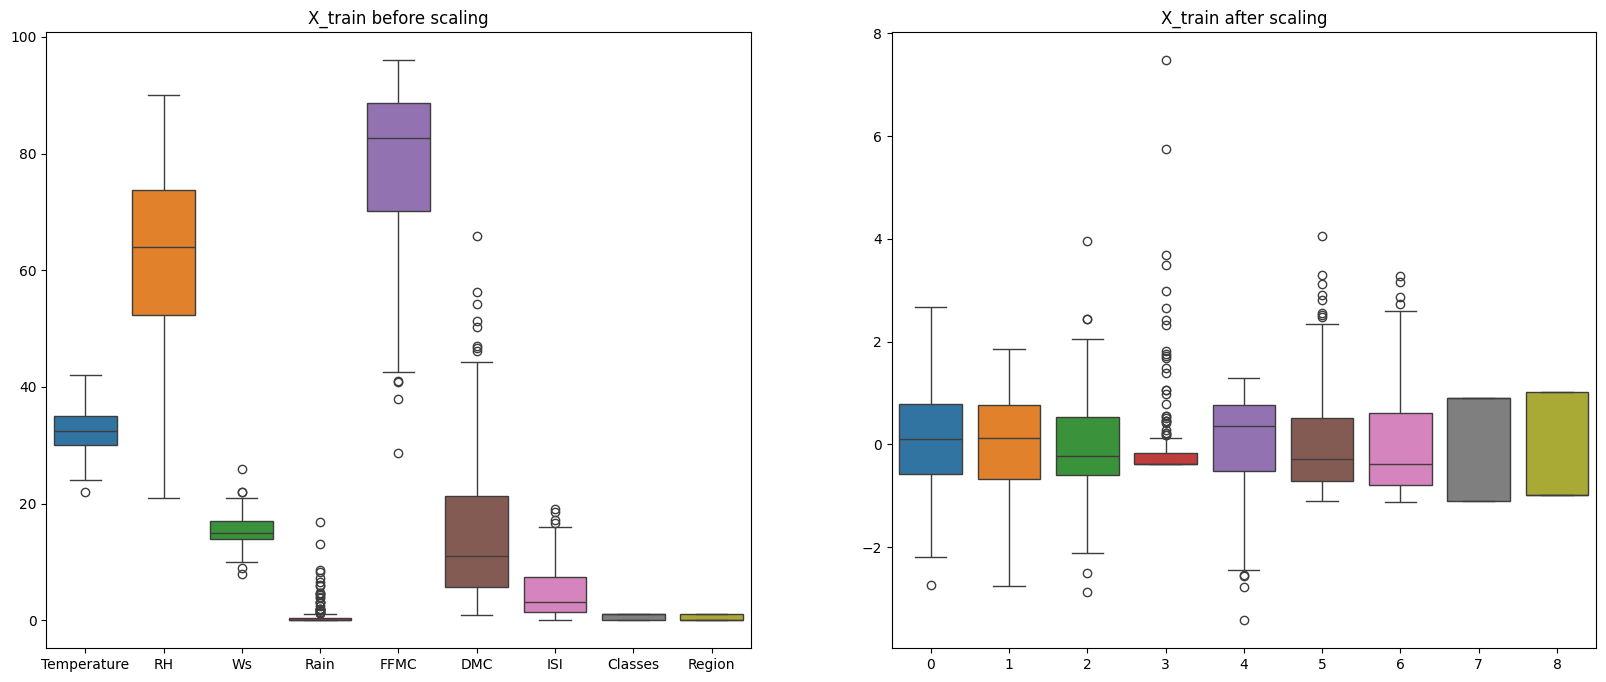

In [16]:
## box plot to understand effect of standard scaler
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.boxplot(data=X_train, ax=ax[0])
ax[0].set_title('X_train before scaling')

sns.boxplot(data=X_train_scaled, ax=ax[1])
ax[1].set_title('X_train after scaling')

plt.show()


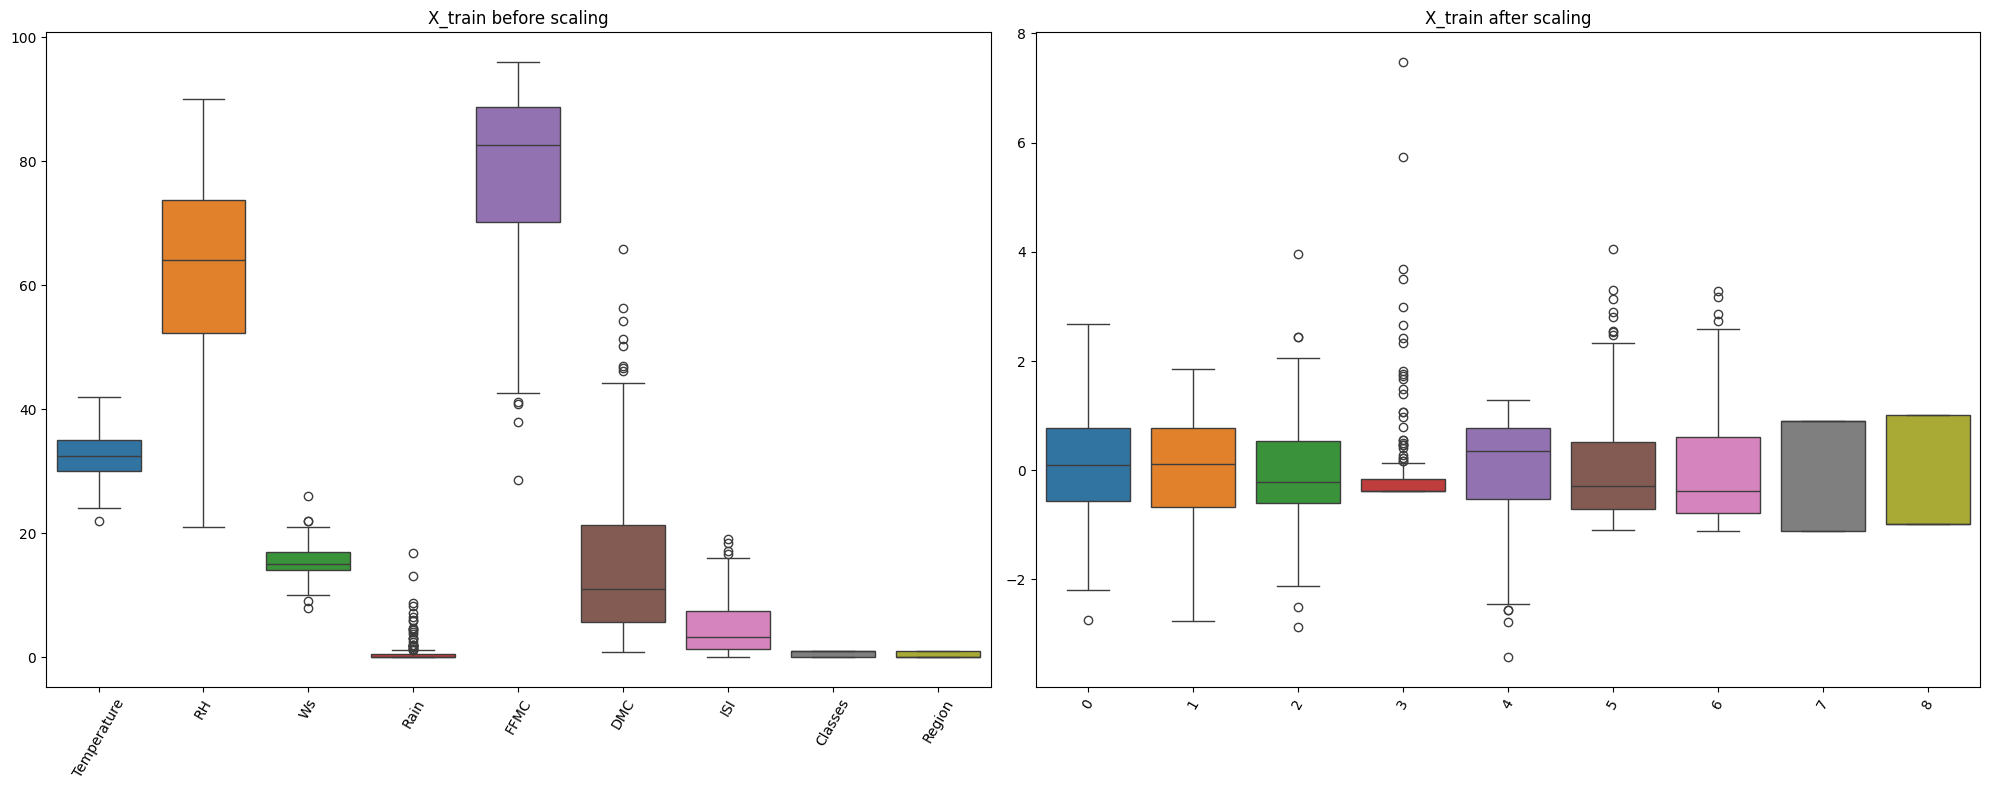

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.boxplot(data=X_train, ax=ax[0])
ax[0].set_title('X_train before scaling')
ax[0].tick_params(axis='x', rotation=60)

sns.boxplot(data=X_train_scaled, ax=ax[1])
ax[1].set_title('X_train after scaling')
ax[1].tick_params(axis='x', rotation=60)

plt.tight_layout()
plt.show()

## Linear regression Model

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error, mean_squared_error
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

In [19]:
mae, r2, rmse

(0.5468236465249978, 0.9847657384266951, 0.8211435242265253)

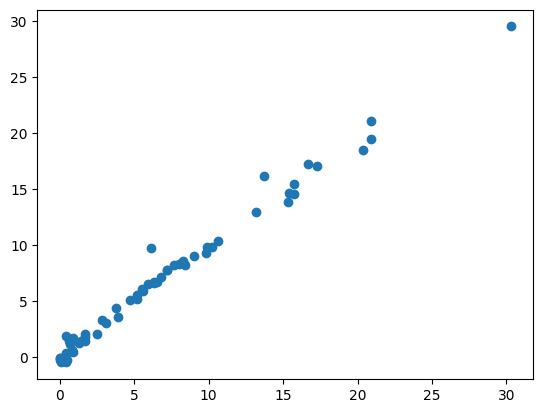

In [20]:
plt.scatter(y_test, y_pred)

## Lasso regression

In [21]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"model performance : mae {mae}, r2 {r2}, rmse {rmse}")

model performance : mae 1.1331759949144087, r2 0.9492020263112388, rmse 1.499448529259166


## lasso with cross validation

In [25]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV()
lassocv.fit(X_train_scaled, y_train)
y_pred = lassocv.predict(X_test_scaled)

model performance : mae 0.6358894638564663, r2 0.9814406737205228, rmse 0.9063365028150442


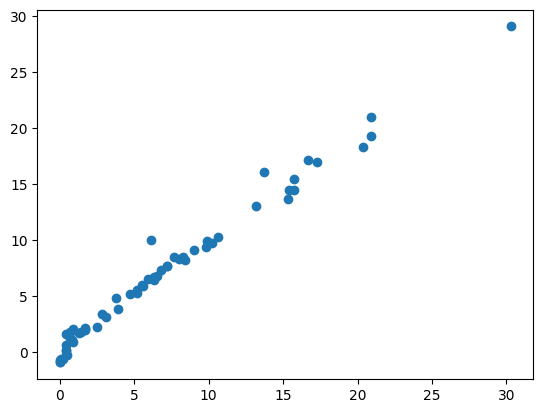

In [27]:
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"model performance : mae {mae}, r2 {r2}, rmse {rmse}")

## Ridge regression

In [22]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X=X_train_scaled, y=y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"model performance : mae {mae}, r2 {r2}, rmse {rmse}")

model performance : mae 0.5642305340105715, r2 0.9842993364555512, rmse 0.8336185529456561


model performance : mae 0.5642305340105715, r2 0.9842993364555512, rmse 0.8336185529456561


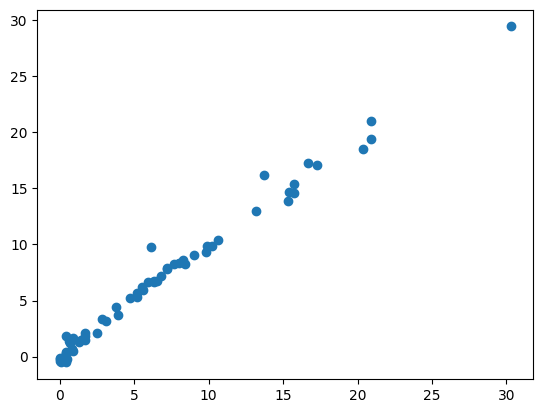

In [30]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
fold = KFold(10)
ridgecv = RidgeCV(cv = fold)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"model performance : mae {mae}, r2 {r2}, rmse {rmse}")

## Elastic Regression

In [23]:
from sklearn.linear_model import ElasticNet
elstic = ElasticNet()
elstic.fit(X=X_train_scaled, y=y_train)
y_pred = elstic.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"model performance : mae {mae}, r2 {r2}, rmse {rmse}")

model performance : mae 1.8822353634895999, r2 0.8753460589519703, rmse 2.3488829474933874
